# Banking Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

# Step 1: Loading the Data

In [2]:
Banking_df=pd.read_csv(r'C:\Data_science\credit_risk_dataset.csv')

In [3]:
Banking_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
Banking_df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
Banking_df.shape

(32581, 12)

In [6]:
Banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
Banking_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
Banking_df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [9]:
Banking_df.drop_duplicates(keep='first',inplace=True)

In [10]:
Banking_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
Banking_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
Banking_df.replace('',np.nan,inplace=True)

In [13]:
Banking_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
Banking_df.dropna(axis=0,how='any',inplace=True)

In [15]:
Banking_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
Banking_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [17]:
Banking_df.reset_index(inplace=True)

In [18]:
Banking_df.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [19]:
Banking_df.drop('index',axis=1,inplace=True)

In [20]:
Banking_case_df=Banking_df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length','loan_status']]

In [21]:
Banking_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_percent_income         28501 non-null  float64
 9   cb_person_default_on_file   28501 non-null  object 
 10  cb_person_cred_hist_length  28501 non-null  int64  
 11  loan_status                 28501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


In [22]:
Banking_case_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.169517,5.800498,0.217115
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.106410,4.042153,0.412289
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [23]:
Banking_case_df.to_csv(r'C:\Data_science\Banking_case.csv')

In [24]:
Banking_case_df=pd.read_csv(r'C:\Data_science\Banking_case.csv')

# Machine Learning

In [25]:
Banking_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28501 non-null  int64  
 1   person_age                  28501 non-null  int64  
 2   person_income               28501 non-null  int64  
 3   person_home_ownership       28501 non-null  object 
 4   person_emp_length           28501 non-null  float64
 5   loan_intent                 28501 non-null  object 
 6   loan_grade                  28501 non-null  object 
 7   loan_amnt                   28501 non-null  int64  
 8   loan_int_rate               28501 non-null  float64
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
 12  loan_status                 28501 non-null  int64  
dtypes: float64(3), int64(6), object

In [26]:
Banking_case_df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
Banking_case_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28496,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
28497,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
28498,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
28499,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


# Step 2: Data Preparation

* Train Test Split
* Encoding for Categorical Columns
    * Ordinal : LabelEncoding or OrdinalEncoding
    * Nominal : OneHotEncoding or get_dummies
* Encoding for Numerical Columns
* Standardization (z-transformation)

## We will be following below mentioned steps:
a. Identify the Target Variable and Splitting the Data into train and test

b. Separating Categorical and Numerical Columns

c. Rescaling Numerical Columns (Standardization or z-transformation)

d. Applying OneHotEncoding on Categorical Columns

e. Applying Label Encoding on Categorical Columns

f. Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [28]:
# !pip install -U scikit-learn

In [29]:
print(sklearn.__version__)

1.1.1


#### predict if in case the loan is given, will the customer default or not on the Loan payments.

In [30]:
# here Target Variable is loan_status and Target Variable present in the data 
# then we say that it is supervised learning and loan_status is categorical

## a. Identify the Target Variable and Splitting the Data into Train and Test.

In [31]:
# Identifying the inputs (X) and output (y)
y=Banking_case_df['loan_status']
X=Banking_case_df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [32]:
type(X)

pandas.core.frame.DataFrame

In [33]:
type(y)

pandas.core.series.Series

# Step 3: Spliting the dataset into Training and Testing(75:25) 

In [34]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)

In [35]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5480,26,33600,RENT,4.0,DEBTCONSOLIDATION,B,6000,10.71,0.18,N,3
28397,53,43200,RENT,0.0,VENTURE,B,10000,9.88,0.23,N,30
27882,44,175000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,15000,7.66,0.09,N,17
9674,25,63000,RENT,6.0,VENTURE,C,4200,14.22,0.07,N,4
13688,25,133000,MORTGAGE,8.0,DEBTCONSOLIDATION,F,3000,17.90,0.02,Y,2


In [36]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21375, 11) (21375,)
(7126, 11) (7126,)


# Step 4: Data prepation on train data

## b. Separating Categorical and Numerical Columns:

In [37]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5480,26,33600,RENT,4.0,DEBTCONSOLIDATION,B,6000,10.71,0.18,N,3
28397,53,43200,RENT,0.0,VENTURE,B,10000,9.88,0.23,N,30
27882,44,175000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,15000,7.66,0.09,N,17
9674,25,63000,RENT,6.0,VENTURE,C,4200,14.22,0.07,N,4
13688,25,133000,MORTGAGE,8.0,DEBTCONSOLIDATION,F,3000,17.90,0.02,Y,2


In [38]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [39]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
5480,RENT,DEBTCONSOLIDATION,B,N
28397,RENT,VENTURE,B,N
27882,MORTGAGE,HOMEIMPROVEMENT,A,N
9674,RENT,VENTURE,C,N
13688,MORTGAGE,DEBTCONSOLIDATION,F,Y


In [40]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5480,26,33600,4.0,6000,10.71,0.18,3
28397,53,43200,0.0,10000,9.88,0.23,30
27882,44,175000,9.0,15000,7.66,0.09,17
9674,25,63000,6.0,4200,14.22,0.07,4
13688,25,133000,8.0,3000,17.90,0.02,2


## c. Scaling the Numerical Features

In [41]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5480,26,33600,4.0,6000,10.71,0.18,3
28397,53,43200,0.0,10000,9.88,0.23,30
27882,44,175000,9.0,15000,7.66,0.09,17
9674,25,63000,6.0,4200,14.22,0.07,4
13688,25,133000,8.0,3000,17.90,0.02,2


In [42]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [43]:
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5480,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560
28397,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683
27882,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566
9674,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551
13688,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569


## d. Applying OneHotEncoding on Categorical Columns

In [44]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
5480,RENT,DEBTCONSOLIDATION,B,N
28397,RENT,VENTURE,B,N
27882,MORTGAGE,HOMEIMPROVEMENT,A,N
9674,RENT,VENTURE,C,N
13688,MORTGAGE,DEBTCONSOLIDATION,F,Y


In [45]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True)

N    0.822737
Y    0.177263
Name: cb_person_default_on_file, dtype: float64

In [46]:
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.199158
MEDICAL              0.185637
PERSONAL             0.171415
VENTURE              0.170386
DEBTCONSOLIDATION    0.162105
HOMEIMPROVEMENT      0.111298
Name: loan_intent, dtype: float64

In [47]:
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.510316
MORTGAGE    0.410105
OWN         0.076211
OTHER       0.003368
Name: person_home_ownership, dtype: float64

In [48]:
X_train_cat_OHE=X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [49]:
X_train_cat_OHE

,person_home_ownership,loan_intent,cb_person_default_on_file
5480,RENT,DEBTCONSOLIDATION,N
28397,RENT,VENTURE,N
27882,MORTGAGE,HOMEIMPROVEMENT,N
9674,RENT,VENTURE,N
13688,MORTGAGE,DEBTCONSOLIDATION,Y
...,...,...,...
12119,OWN,EDUCATION,Y
24423,MORTGAGE,HOMEIMPROVEMENT,N
14147,MORTGAGE,PERSONAL,N
23320,MORTGAGE,MEDICAL,Y


In [50]:
X_train_cat_OHE.columns

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [51]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_=OneHotEncoder(drop='first',min_frequency=3000,sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder_.fit_transform(X_train_cat_OHE),
                            columns=encoder_.get_feature_names_out(X_train_cat_OHE.columns),
                            index=X_train_cat_OHE.index)
X_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
5480,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9674,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [53]:
encoder_.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [54]:
encoder_.infrequent_categories_

[array(['OTHER', 'OWN'], dtype=object),
 array(['HOMEIMPROVEMENT'], dtype=object),
 None]

In [55]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat_OHE),
                            columns=encoder.get_feature_names_out(X_train_cat_OHE.columns),
                            index=X_train_cat_OHE.index)
X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
5480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## e. Applying Label Encoding on Categorical Columns

In [56]:
X_train_cat_LE=pd.DataFrame(index=X_train_cat.index)
X_train_cat_LE

""
5480
28397
27882
9674
13688
...
12119
24423
14147
23320


In [57]:
X_train_cat['loan_grade'].unique()

array(['B', 'A', 'C', 'F', 'D', 'E', 'G'], dtype=object)

In [58]:
X_train_cat['loan_grade'].value_counts()

A    7043
B    6748
C    4246
D    2458
E     673
F     162
G      45
Name: loan_grade, dtype: int64

In [59]:
grade_encode={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

X_train_cat_LE['loan_grade']=X_train_cat['loan_grade'].apply(lambda x:grade_encode[x])

In [60]:
X_train_cat_LE['loan_grade']

5480     6
28397    6
27882    7
9674     5
13688    2
        ..
12119    4
24423    6
14147    7
23320    5
5640     5
Name: loan_grade, Length: 21375, dtype: int64

In [61]:
X_train_cat['loan_grade']

5480     B
28397    B
27882    A
9674     C
13688    F
        ..
12119    D
24423    B
14147    A
23320    C
5640     C
Name: loan_grade, Length: 21375, dtype: object

In [62]:
X_train_cat_LE.head()

,loan_grade
5480,6
28397,6
27882,7
9674,5
13688,2


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [63]:
X_train_transformed=pd.concat([X_train_num_rescaled,
                               X_train_cat_ohe,X_train_cat_LE],axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
5480,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
28397,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
27882,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
9674,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5
13688,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


## Step 5: Data Preparation on Test Data

In [64]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26154,37,40800,OWN,0.0,VENTURE,C,4000,13.49,0.10,Y,14
14216,24,72000,RENT,5.0,HOMEIMPROVEMENT,B,8000,10.00,0.11,N,2
7066,24,55000,MORTGAGE,4.0,DEBTCONSOLIDATION,C,1600,13.79,0.03,N,2
21607,30,66000,RENT,5.0,EDUCATION,D,10000,14.83,0.15,Y,9
25668,41,75000,RENT,1.0,PERSONAL,B,20000,11.14,0.27,N,11


In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7126 entries, 26154 to 10638
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7126 non-null   int64  
 1   person_income               7126 non-null   int64  
 2   person_home_ownership       7126 non-null   object 
 3   person_emp_length           7126 non-null   float64
 4   loan_intent                 7126 non-null   object 
 5   loan_grade                  7126 non-null   object 
 6   loan_amnt                   7126 non-null   int64  
 7   loan_int_rate               7126 non-null   float64
 8   loan_percent_income         7126 non-null   float64
 9   cb_person_default_on_file   7126 non-null   object 
 10  cb_person_cred_hist_length  7126 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 668.1+ KB


In [66]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26154,OWN,VENTURE,C,Y
14216,RENT,HOMEIMPROVEMENT,B,N
7066,MORTGAGE,DEBTCONSOLIDATION,C,N
21607,RENT,EDUCATION,D,Y
25668,RENT,PERSONAL,B,N
...,...,...,...,...
11854,RENT,DEBTCONSOLIDATION,F,N
17125,RENT,DEBTCONSOLIDATION,B,N
10537,RENT,PERSONAL,B,N
27226,RENT,MEDICAL,C,N


In [67]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26154,37,40800,0.0,4000,13.49,0.10,14
14216,24,72000,5.0,8000,10.00,0.11,2
7066,24,55000,4.0,1600,13.79,0.03,2
21607,30,66000,5.0,10000,14.83,0.15,9
25668,41,75000,1.0,20000,11.14,0.27,11


In [68]:
# rescaling numerical data
X_test_num_rescaled=pd.DataFrame(scaler.transform(X_test_num),
                                columns=X_test_num.columns,
                                index=X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26154,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539
14216,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569
7066,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569
21607,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494
25668,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512


In [69]:
X_test_cat_ohe=X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_cat_le=X_test_cat['loan_grade']

In [70]:
X_test_cat_OHE=pd.DataFrame(encoder.transform(X_test_cat_ohe),
                           columns=encoder.get_feature_names_out(X_test_cat_ohe.columns),
                           index=X_test_cat_ohe.index)

X_test_cat_LE=pd.DataFrame(index=X_test_cat.index)

In [71]:
grade_encode={'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

X_test_cat_LE['loan_grade']=X_test_cat['loan_grade'].apply(lambda x: grade_encode[x])

In [72]:
X_test_transformed=pd.concat([X_test_num_rescaled,
                              X_test_cat_OHE,X_test_cat_LE],axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
26154,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5
14216,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6
7066,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
21607,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
25668,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6


## Step 6:Model Training Phase

In [73]:
X_train_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

In [74]:
X_test_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
loan_grade                     0
dtype: int64

In [75]:
y_train.isna().sum()

0

In [76]:
# the data is supervised learning which has target variable and that is categorical column 
# so, we use classification

## KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [78]:
y_test_pred_knn=classifier.predict(X_test_transformed)

In [79]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_knn})

In [80]:
temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [81]:
# Evaluation (calculate accuracy of class predictions)
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred_knn)

0.9000841987089532

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [84]:
y_test_pred_LR=classifier.predict(X_test_transformed)

In [85]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_LR})

In [86]:
temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [87]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_LR)

0.860931799045748

## Support Vector Machine

In [89]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [90]:
y_test_pred_SVM = classifier.predict(X_test_transformed)

In [91]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_SVM})
temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [92]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_SVM)

0.9012068481616615

##  Decision Trees

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [95]:
y_test_pred_DT = classifier.predict(X_test_transformed)

In [96]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_DT})
temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [97]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_DT).round(2)

0.89

## Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [100]:
y_test_pred_RFC = classifier.predict(X_test_transformed)

In [101]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred_RFC})
temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [102]:
# Evaluation (calculate accuracy of class predictions)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_RFC).round(2)

0.94

In [104]:
algorithms = [ 'KNN', 'Logistic Regression', 'Support Vector Machines', 'Decision Trees' ,'Random Forest']
accuracy = [0.88,0.86,0.90,0.89,0.94]

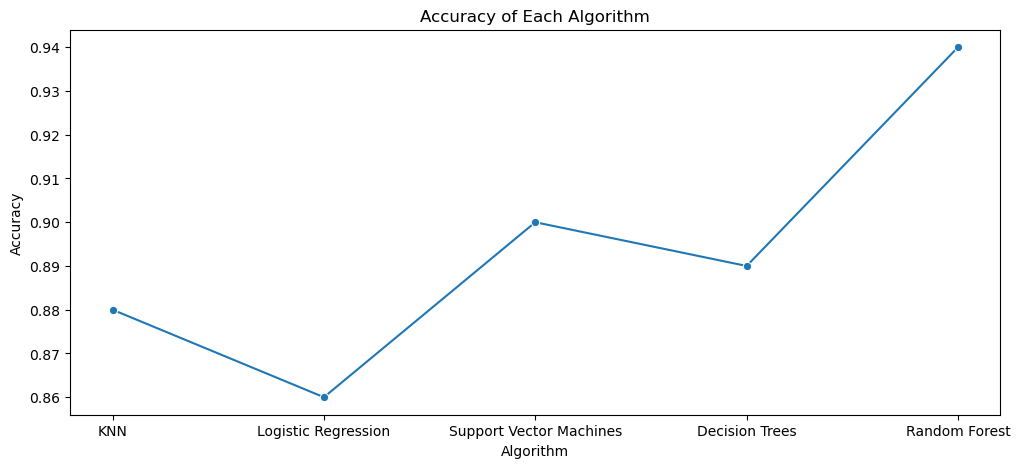

In [105]:
plt.figure(figsize=(12,5))
sns.lineplot(algorithms,accuracy,marker='o')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Algorithm');

**insight:** from above lineplot,i observed that Random Forest classifier accuracy as around **0.94** is more while comparing to other classifiers